### Initial tries and experimenting with feature extraction

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [2]:
model_incep = InceptionV3(include_top=False, weights='imagenet')

In [3]:
def extract_features(image_path):
    img = load_img(image_path, target_size=(299, 299))

    img_array = image.img_to_array(img)
    print(img_array.shape)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input(img_array)

    features = model_incep.predict(img_array)

    return features

In [4]:
# Test with an example image
image_path = 'C:\\Users\\sonia\\Pictures\\a62168474fc8d532c2708aec578cbff5.jpg'  # Replace with your image path
features = extract_features(image_path)

# Display the shape of the extracted features
print("Shape of extracted features:", features.shape)

(299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Shape of extracted features: (1, 8, 8, 2048)


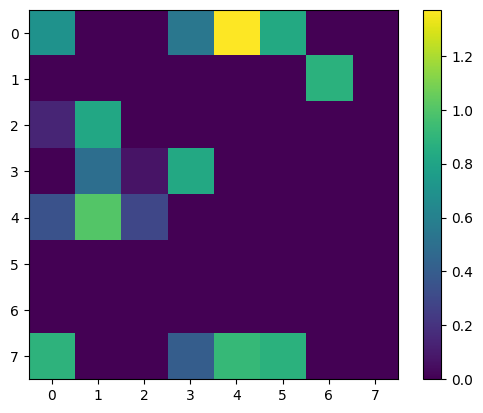

In [5]:
import matplotlib.pyplot as plt

# Extract the feature map of the last convolutional layer (8x8x2048)
feature_map = features[0]  # Remove the batch dimension

# Plot the feature map for the first channel (2048 channels)
plt.imshow(feature_map[:, :, 0], cmap='viridis')
plt.colorbar()
plt.show()

In [6]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [2]:
import pandas as pd
import zipfile
import nltk
import re

# nltk.download('punkt')

In [3]:
import json

zip_file_path = 'C:/Users/sonia/Desktop/ig-caption-gen/kaggle-dataset.zip'
csv_file_name = 'instagram_data/captions_csv.csv'

bad_words = ['fuck', 'bitch', 'hoe', 'motherfucker']

with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)

df.head()

def contains_date(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'DATE':
            return True
    return False


def tokenize_caption(text):
    text = text.lower()
    # text = text.replace(r',|.', '')
    text = text.replace(r' +|\t', ' ')
    tokens = nltk.word_tokenize(text)
    tokens = ['<start>'] + tokens + ['<end>']
    return tokens


data = df.dropna(subset=['Caption'])
data = data[['Image File', 'Caption']]
data = data.drop_duplicates(subset=['Caption'])
data = data[data['Caption'].apply(len) < 60]
data = data[~data['Caption'].str.contains(r'http\S+|www\S+', regex=True)]
data = data[~data['Caption'].str.contains('|'.join(bad_words), case=False)]
data['Tokenized Caption'] = data['Caption'].apply(tokenize_caption)

data.to_csv('caption_data.csv', sep=',', index=False, encoding='utf-8')

print(data.shape)


# new_df = new_df['Contains date'] = new_df['Caption'].apply(contains_date)
# new_df = new_df[new_df['Contains date'] == True]
# print(new_df.head())

(12031, 3)


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

data = pd.read_csv('caption_data.csv')

special_tokens = ['<start>', '<end>']

tokenized_captions = data['Tokenized Caption'].tolist()

tokenizer = Tokenizer(filters='.,', oov_token='<unk>')

tokenizer.fit_on_texts(special_tokens)
tokenizer.fit_on_texts(tokenized_captions)
encoded_tokens = tokenizer.texts_to_sequences(tokenized_captions)

data['Encoded Tokens'] = encoded_tokens

data.to_csv('caption_data.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
import zipfile
import os
import pandas as pd

zip_file_path = 'C:/Users/sonia/Desktop/ig-caption-gen/kaggle-dataset.zip'
img_folder = 'instagram_data/img/'

df = pd.read_csv('caption_data.csv')

images_names = df['Image File'].values
images_names = [os.path.basename(img) + '.jpg' for img in images_names]



with zipfile.ZipFile(zip_file_path, 'r') as z:
    for file in z.namelist():
        if file.startswith(img_folder):
            img_name = os.path.basename(file)
            if img_name in images_names[:20]:
                print(file)

instagram_data/img/insta10.jpg
instagram_data/img/insta11.jpg
instagram_data/img/insta15.jpg
instagram_data/img/insta16.jpg
instagram_data/img/insta17.jpg
instagram_data/img/insta18.jpg
instagram_data/img/insta19.jpg
instagram_data/img/insta2.jpg
instagram_data/img/insta21.jpg
instagram_data/img/insta22.jpg
instagram_data/img/insta27.jpg
instagram_data/img/insta29.jpg
instagram_data/img/insta3.jpg
instagram_data/img/insta30.jpg
instagram_data/img/insta31.jpg
instagram_data/img/insta32.jpg
instagram_data/img/insta37.jpg
instagram_data/img/insta38.jpg
instagram_data/img/insta5.jpg
instagram_data/img/insta7.jpg
